In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
#import the package
from solve_SIR import solveSIR

In [2]:
data = pd.read_csv('/Users/omarafifi/MyFolders/Differential-Game-Theory-for-SIR-Models/Data/formatted_data.csv')

In [3]:
S, I, R = data['S'].to_numpy(), data['I'].to_numpy(),  data['R'].to_numpy()
S_0, I_0, R_0  = S[0], I[0], R[0]


In [4]:
solver = solveSIR(S_true = S, I_true = I, R_true = R, N = 10200000, p_0 = (3, 1, S_0, I_0, R_0))
solver.fit()

params, values = solver.fit()
print(params, values)

(3, 1, 8749080, 455710.0, 995210.0)
lambda  [[ 2.12445124e+06 -3.53162383e+06  0.00000000e+00]
 [ 2.12445719e+06 -3.68330603e+06  0.00000000e+00]
 [ 2.12447205e+06 -3.92883652e+06  0.00000000e+00]
 [ 2.12450667e+06 -4.12185348e+06  0.00000000e+00]
 [ 2.12458008e+06 -4.38003632e+06  0.00000000e+00]
 [ 2.12475822e+06 -4.65528757e+06  0.00000000e+00]
 [ 2.12515150e+06 -5.09111217e+06  0.00000000e+00]
 [ 2.12610699e+06 -5.73608550e+06  0.00000000e+00]
 [ 2.12870777e+06 -6.22613533e+06  0.00000000e+00]
 [ 2.13488535e+06 -6.59190181e+06  0.00000000e+00]
 [ 2.15645448e+06 -6.57208403e+06  0.00000000e+00]
 [ 2.18308678e+06 -6.29611969e+06  0.00000000e+00]
 [ 2.23482716e+06 -5.55949248e+06  0.00000000e+00]
 [ 2.33536754e+06 -4.28281373e+06  0.00000000e+00]
 [ 2.52905447e+06 -2.74882983e+06  0.00000000e+00]
 [ 2.86586058e+06 -7.99910828e+05  0.00000000e+00]
 [ 3.32349997e+06  1.49263463e+06  0.00000000e+00]
 [ 3.59203527e+06  3.94337411e+06  0.00000000e+00]
 [ 2.83784540e+06  5.52067453e+06  0.0

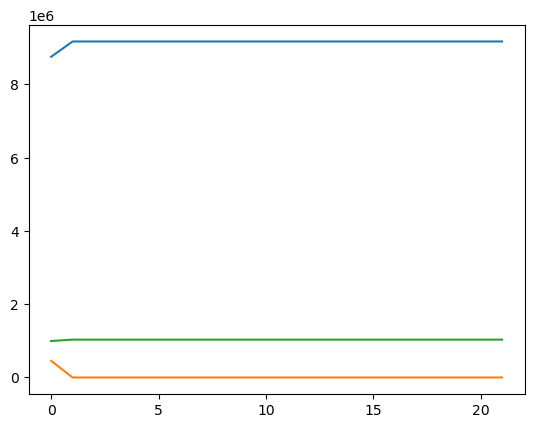

In [5]:
import matplotlib.pyplot as plt
plt.plot( np.arange(0, len(values), 1), values[:,0])
plt.plot( np.arange(0, len(values), 1), values[:,1])
plt.plot( np.arange(0, len(values), 1), values[:,2])

In [6]:
from scipy.integrate import solve_ivp
def SIR(t, V, *args):

    """defines the SIR model dynamics
    V = (S, I, R)
    args = (N,Β, γ)
    """

    N, B, g  = args
    S, I, R = V

    dS = -(B/N)*S*I
    dI = (B/N)*S*I - g*I
    dR = g*I


    return dS, dI, dR

def forwardSolve(f, v0, p):

    """solves the forward problem
    """
    time_steps = np.arange(0, 22, 1)

    return solve_ivp(fun = SIR, 
                    y0 = v0,
                    t_span = [0, 21], 
                    t_eval = time_steps,
                    args = p)

In [7]:
V = forwardSolve(SIR, [8707278.847301165, 348887.3553202654, 995210.0], (10200000,.588, .222) ).y.T

#[-85488872217.51266, 180280774362.75262, 8707278.847301165, 348887.3553202654, 995210.0]

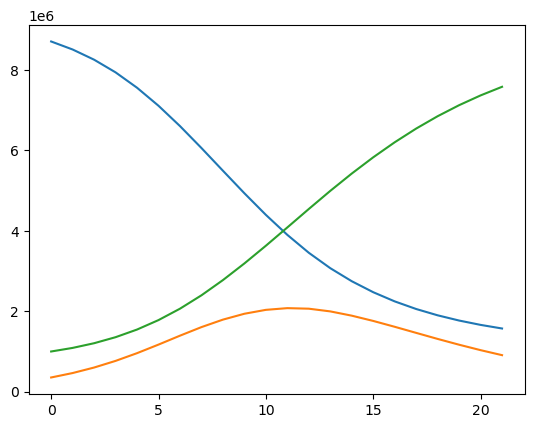

In [8]:
plt.plot(np.arange(0, 22, 1), V[:, 0])
plt.plot(np.arange(0, 22, 1), V[:, 1])
plt.plot(np.arange(0, 22, 1), V[:, 2])

In [9]:
type(V)

numpy.ndarray

In [10]:
V[-1]

array([1567429.86903426,  904048.77711359, 7579897.55647358])

In [11]:
from scipy.integrate import odeint
def BSIR(t, V, *args):

    """defines the SIR model dynamics
    V = (S, I, R)
    args = (N,Β, γ)
    """

    N, B, g  = args
    S, I, R = V

    dS = -(B/N)*S*I
    dI = (B/N)*S*I - g*I
    dR = g*I


    return -dS, -dI, -dR

def backSolve(f, v0, p):

    """solves the forward problem
    """
    time_steps = np.arange(0, 22, 1)

    return solve_ivp(fun = BSIR, 
                    y0 = v0,
                    t_span = [0, 21], 
                    t_eval = time_steps,
                    args = p).y.T[::-1]

In [12]:
plt.plot(np.arange(0, 22, 1), VV[:, 0])
plt.plot(np.arange(0, 22, 1), VV[:, 1])
plt.plot(np.arange(0, 22, 1), VV[:, 2])

NameError: name 'VV' is not defined